C:\Users\nodoteve\AppData\Local\Temp\ipykernel_13204\242396795.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  a:DataFrame = df.pivot(y_name, x_name, "v")


a        2.700     2.737     2.774     2.811     2.847     2.884     2.921  \
b                                                                            
0.40  0.529251  0.535167  0.541181  0.546913  0.552521  0.557784  0.563099   
0.08  0.328899  0.321058  0.339694  0.318674  0.350006  0.351502  0.368950   

a        2.958     2.995     3.032     3.068     3.105     3.142     3.179  \
b                                                                            
0.40  0.568391  0.573589  0.578592  0.583437  0.588456  0.593207  0.597874   
0.08  0.365244  0.410948  0.372328  0.385790  0.382338  0.394350  0.390011   

a        3.216     3.253     3.289     3.326     3.363     3.400  
b                                                                 
0.40  0.602374  0.606608  0.611141  0.615550  0.619503  0.623991  
0.08  0.406164  0.402443  0.398755  0.403471  0.413477  0.374948  


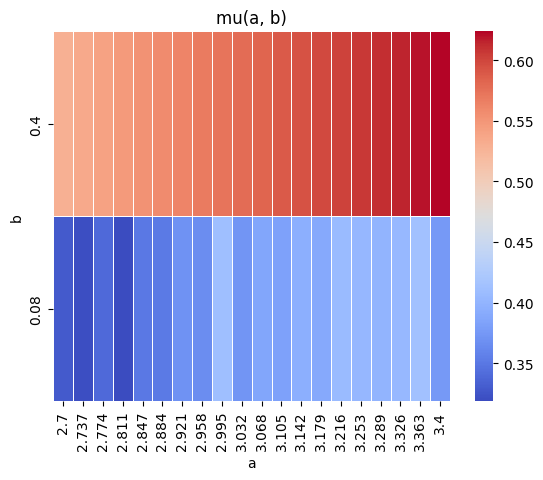

In [2]:
# Program to plot 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# rings1 - PEC rings simple lattice
# rings2 - copper rings simple lattice
# rings3 - copper rings 2 layer lattice with shift in direction of x axis

filename = "../rings3/rings3_test_mu(a,b)_wide.txt"
x_name = "a"
y_name = "b"

# data in the form of list of tuples
def get_and_apply_f(func):
    data_set = []
    with open(filename) as f:
        lines = f.readlines()
        for line_id in range(len(lines)):
            line = lines[line_id]
            if line[0] == "#":
                if line[1] == "P":

                    def read_param(name):
                        id = line.find(name + "=")
                        id_of_semicolon = line.find(";", id)
                        id_of_semicolon = (
                            id_of_semicolon if id_of_semicolon > 0 else len(line)
                        )
                        p = line[
                            id + len(name) + 1 : min(id_of_semicolon, line.find("}", id))
                        ]
                        return float(p)

                    x = read_param(x_name)
                    y = read_param(y_name)

                    # find avg of mu for all freq for given x, y
                    vals = []
                    for id in range(line_id + 1, len(lines)):
                        line = lines[id]
                        if line[0] == "#":
                            if line[1] == "P":
                                break
                        else:
                            tuple_of_vals = [float(x) for x in line.split()]
                            vals.append(tuple_of_vals[1])
                    data_set.append((x, y, func(vals)))
    return data_set

# reformat data for drawing
import pandas as pd
from pandas import DataFrame

# create DataFrame using data
def draw(data, name):
    df = pd.DataFrame(data, columns=[x_name, y_name, "v"])
    df[x_name]=df[x_name].round(3)
    df[y_name]=df[y_name].round(3)
    # print(df[x_name],df[y_name])
    a:DataFrame = df.pivot(y_name, x_name, "v")
    a = a.reindex(a.sort_values(by=y_name, ascending=False).index)

    print(a)
    ax = sns.heatmap(a, linewidth=0.5, cmap="coolwarm")

    title = "mu(" + x_name + ", " + y_name + ")"
    plt.title(title)
    plt.savefig(filename.replace(".txt", "") + "__" + title+"_plot_"+name + ".png",bbox_inches='tight')
    plt.show()

draw(get_and_apply_f(np.mean), "mean")
# draw(get_and_apply_f(np.min),"min")
# draw(get_and_apply_f(np.max),"max")